   2001  49.94357  21.47114  73.07750   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

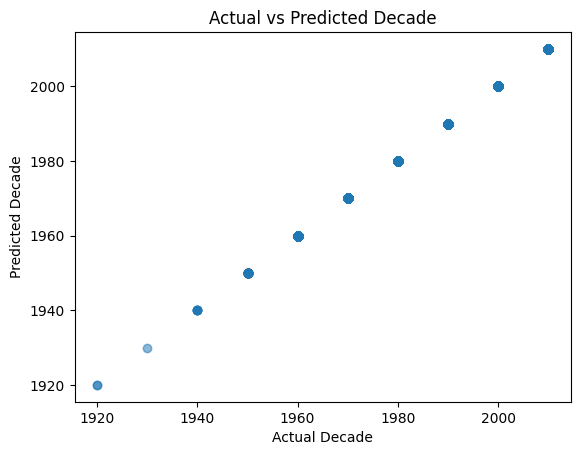

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/YearPredictionMSD.txt', delimiter=',')  # Adjust delimiter if necessary
print(data.head())

# Convert year to decade
data['Decade'] = (data.iloc[:, 0] // 10) * 10

# Split the data
train_data = data.iloc[:463715]
test_data = data.iloc[-51630:]

# Sample a quarter of the training data
sampled_train_data = train_data.sample(frac=0.25, random_state=42)
print(sampled_train_data.shape)

# Sample a quarter of the testing data
sampled_test_data = test_data.sample(frac=0.25, random_state=42)
print(sampled_test_data.shape)

# Separate features and target for the sampled training data
X_sampled_train = sampled_train_data.iloc[:, 1:]  # All columns except the first one (year)
y_sampled_train = sampled_train_data['Decade']    # The Decade column

# Separate features and target for the sampled test data
X_sampled_test = sampled_test_data.iloc[:, 1:]    # All columns except the first one (year)
y_sampled_test = sampled_test_data['Decade']      # The Decade column

# Train Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_sampled_train, y_sampled_train)

# Evaluate Model Performance

# Predict on the test set
y_pred = rf.predict(X_sampled_test)

# Evaluate the model
mse = mean_squared_error(y_sampled_test, y_pred)
r2 = r2_score(y_sampled_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(y_sampled_test, y_pred, alpha=0.3)
plt.xlabel('Actual Decade')
plt.ylabel('Predicted Decade')
plt.title('Actual vs Predicted Decade')
plt.show()

# Sampled

   2001  49.94357  21.47114  73.07750   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

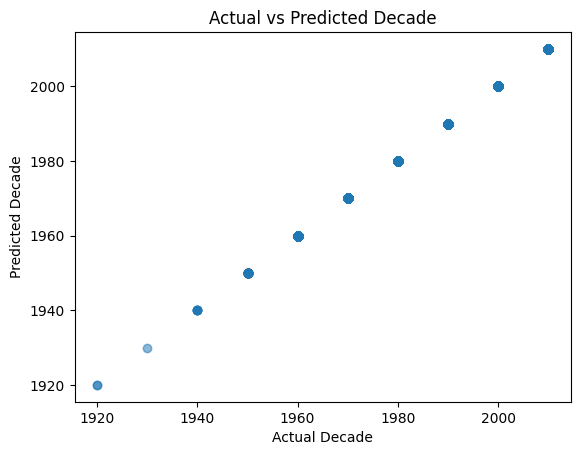

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/YearPredictionMSD.txt', delimiter=',')  # Adjust delimiter if necessary
print(data.head())

# Convert year to decade
data['Decade'] = (data.iloc[:, 0] // 10) * 10

# Split the data
train_data = data.iloc[:463715]
test_data = data.iloc[-51630:]

# Sample a quarter of the training data
sampled_train_data = train_data.sample(frac=0.25, random_state=42)
print(sampled_train_data.shape)

# Sample a quarter of the testing data
sampled_test_data = test_data.sample(frac=0.25, random_state=42)
print(sampled_test_data.shape)

# Separate features and target for the sampled training data
X_sampled_train = sampled_train_data.iloc[:, 1:]  # All columns except the first one (year)
y_sampled_train = sampled_train_data['Decade']    # The Decade column

# Separate features and target for the sampled test data
X_sampled_test = sampled_test_data.iloc[:, 1:]    # All columns except the first one (year)
y_sampled_test = sampled_test_data['Decade']      # The Decade column

# Train Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_sampled_train, y_sampled_train)

# Predict on the test set
y_pred = rf.predict(X_sampled_test)

# Evaluate the model
mse = mean_squared_error(y_sampled_test, y_pred)
r2 = r2_score(y_sampled_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Inspect the predictions
predictions_df = pd.DataFrame({'Actual': y_sampled_test, 'Predicted': y_pred})
print(predictions_df.head(20))

# Plot the results
plt.scatter(y_sampled_test, y_pred, alpha=0.3)
plt.xlabel('Actual Decade')
plt.ylabel('Predicted Decade')
plt.title('Actual vs Predicted Decade')
plt.show()

In [3]:
y_sampled_test.head()

508641    2000
489638    2000
511098    2000
472284    2000
466941    2000
Name: Decade, dtype: int64

# Full dataset

   2001  49.94357  21.47114  73.07750   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

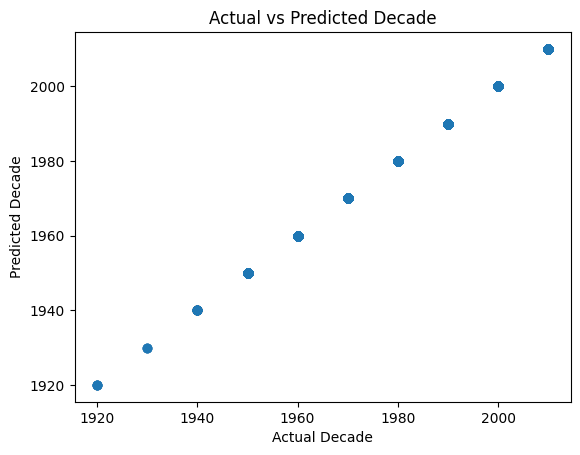

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/YearPredictionMSD.txt', delimiter=',')  # Adjust delimiter if necessary
print(data.head())

# Convert year to decade
data['Decade'] = (data.iloc[:, 0] // 10) * 10

# Split the data
train_data = data.iloc[:463715]
test_data = data.iloc[-51630:]

# Separate features and target for the training data
X_train = train_data.iloc[:, 1:]  # All columns except the first one (year)
y_train = train_data['Decade']    # The Decade column

# Separate features and target for the test data
X_test = test_data.iloc[:, 1:]    # All columns except the first one (year)
y_test = test_data['Decade']      # The Decade column

# Train Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Inspect the predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head(20))

# Plot the results
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Decade')
plt.ylabel('Predicted Decade')
plt.title('Actual vs Predicted Decade')
plt.show()

Mean Squared Error: 0.0
R^2 Score: 1.0
    Actual  Predicted
0     2000     2000.0
1     2000     2000.0
2     2000     2000.0
3     2000     2000.0
4     2000     2000.0
5     2000     2000.0
6     2000     2000.0
7     2000     2000.0
8     2000     2000.0
9     2000     2000.0
10    2000     2000.0
11    2000     2000.0
12    2000     2000.0
13    1990     1990.0
14    2000     2000.0
15    2000     2000.0
16    1990     1990.0
17    1990     1990.0
18    1980     1980.0
19    2000     2000.0


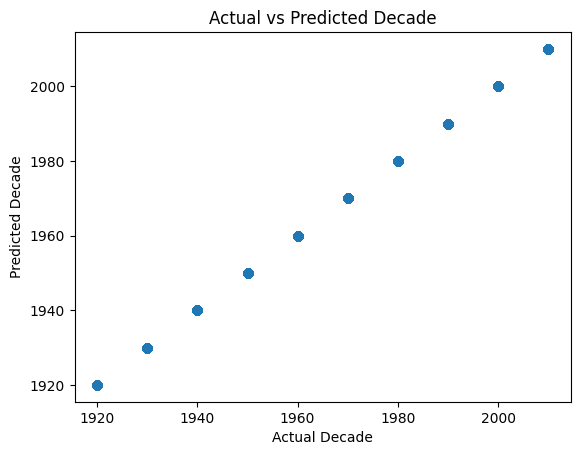

In [10]:
# Predict on the test set
y_train_pred = rf.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Inspect the predictions
predictions_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print(predictions_df.head(20))

# Plot the results
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel('Actual Decade')
plt.ylabel('Predicted Decade')
plt.title('Actual vs Predicted Decade')
plt.show()

In [11]:
X_test

,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,...,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327,Decade
463714,45.44200,-30.74976,31.78587,4.63569,-15.14894,0.23370,-11.97968,-9.59708,6.48111,-8.89073,...,-0.15439,137.44210,77.54739,-4.22875,-61.92657,-33.52722,-3.86253,36.42400,7.17309,2000
463715,52.67814,-2.88914,43.95268,-1.39209,-14.93379,-15.86877,1.19379,0.31401,-4.44235,-5.78934,...,-42.57910,-2.91103,48.72805,-3.08183,-9.38888,-7.27179,-4.00966,-68.96211,-5.21525,2000
463716,45.74235,12.02291,11.03009,-11.60763,11.80054,-11.12389,-5.39058,-1.11981,-7.74086,-3.33421,...,-24.22599,-35.22686,27.77729,15.38934,58.20036,-61.12698,-10.92522,26.75348,-5.78743,2000
463717,52.55883,2.87222,27.38848,-5.76235,-15.35766,-15.01592,-5.86893,-0.31447,-5.06922,-4.62734,...,-16.86791,-10.58277,40.10173,-0.54005,-11.54746,-45.35860,-4.55694,-43.17368,-3.33725,2000
463718,51.34809,9.02702,25.33757,-6.62537,0.03367,-12.69565,-3.13400,2.98649,-6.71750,-1.85804,...,-20.03371,-66.38940,50.56569,0.27747,67.05657,-55.58846,-7.50859,28.23511,-0.72045,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515339,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,2.67217,...,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052,2000
515340,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,2.20175,...,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815,2000
515341,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,-11.46411,...,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364,2000
515342,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,-0.74075,...,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909,2000


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/YearPredictionMSD.txt', delimiter=',')  # Adjust delimiter if necessary
print(data.head())

# Convert year to decade
data['Decade'] = (data.iloc[:, 0] // 10) * 10

# Split the data
train_data = data.iloc[:463715]
test_data = data.iloc[-51630:]

# Separate features and target for the training data
X_train = train_data.drop(columns=['Decade', train_data.columns[0]])  # Exclude the Year and Decade columns
y_train = train_data['Decade']    # The Decade column

# Separate features and target for the test data
X_test = test_data.drop(columns=['Decade', test_data.columns[0]])    # Exclude the Year and Decade columns
y_test = test_data['Decade']      # The Decade column

# Train Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf.predict(X_train)

# Predict on the test set
y_test_pred = rf.predict(X_test)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R² Score: {train_r2}')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training Root Mean Squared Error: {train_rmse}')

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R² Score: {test_r2}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Test Root Mean Squared Error: {test_rmse}')

# Plot the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())], 
         [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())], 'k--', lw=2)
plt.xlabel('Actual Decade')
plt.ylabel('Predicted Decade')
plt.title('Actual vs Predicted Decade')
plt.show()

   2001  49.94357  21.47114  73.07750   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  